#### Subgradient and nondifferentiable function

A nondifferentiable function $f(x)$ is convex if and only if

for any $x_0\in \text{dom}f$, there exists a vector $g$ such that

$$f(x)\geq f(x_0) + g(x_0)^T(x-x_0)$$

i.e., `global underestimator` of $f$

$g$ is refered to as `subgradient`

Consider function $f(x)=|x|$, at $x=0$, there are infinite number of subgradients $g$, and the `set` of subgradients of $f$ at a point $x$ is called `subdifferential` of $f$ at $x$, denoted as $\partial f(x)$

$$\partial f(x)=\{g|g^T(y-x)\leq f(y)-f(x), \forall y\in \text{dom }f\}$$

* Since $\partial f(x)$ is really an intersection of halfspaces (w.r.t. $g$), it is a closed convex set
* if $x\in \text{int dom }f$, then $\partial f(x)$ is `nonempty and bounded`

Nondifferentiable $f$ is convex if and only if its subgradient is `monotone`

$$\langle g(x_1) - g(x_2) ,x_1-x_2 \rangle \geq 0, \forall g(x_1)\in \partial f(x_1), g(x_2)\in \partial f(x_2)$$

#### Subgradient and sublevel set

If $g$ is a subgradient of $f$ at $x$, then

$$f(y)\leq f(x) \Longrightarrow g^T(y-x)\leq 0$$

Therefore, the nonzero subgradients at $x$ define `supporting hyperplanes` to sublevel set

$$\{y|f(y)\leq f(x)\}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

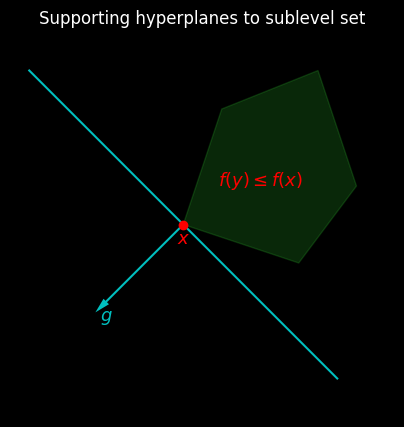

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.text(0, -0.5, "$g$", horizontalalignment='center', fontsize=13, color='c')
polygon_points = np.array([[5.5, 6], [6.5, 3], [5, 1], [2, 2], [3, 5]])
ax.fill(polygon_points[:, 0], polygon_points[:, 1], color='limegreen', alpha=0.2)
ax.plot([2, 0], [2, 0], 'c-')
ax.plot([6, -2], [-2, 6], 'c-')
ax.arrow(0.1, 0.1, -0.1, -0.1,
         head_width=0.2, head_length=0.4, fc='c', ec='none', zorder=5, label='Mirror descent')
ax.scatter(2, 2, color='r', zorder=6)
ax.text(2, 1.5, '$x$', horizontalalignment='center', fontsize=13, color='r')

ax.text(4, 3, '$f(y)\leq f(x)$', horizontalalignment='center', fontsize=13, color='r')
ax.set_xlim(-2.5, 7.5)
ax.set_ylim(-3, 7)
ax.set_aspect('equal')
ax.set_title('Supporting hyperplanes to sublevel set')
ax.set_aspect('equal')
ax.axis('off')

plt.show()

#### Subgradient calculus

* weak rules: to find one subgradient $g$
* strong rules: to find $\partial f(x)$

##### Basic rules

$f$ is convex

* $\partial f(x)=\{\nabla f(x)\}$ if $f$ is differentiable at $x$
* **nonnegative scaling**: $\partial(\alpha f)=\alpha \partial f, \alpha\geq0$
* **addition**: $\partial(f_1+f_2)=\partial f_1 +\partial f_2$
* **affine transformation**: if $g(x)=f(Ax+b)$, then $\partial g(x)=A^T \partial f(Ax+b)$
* **finite pointwise maximum**: if $f=\max_i f_i$, then subdifferential is the `convex hull` of union of subdifferentials of `active` functions at $x$
$$\partial f(x)= \text{conv} \bigcup\{\partial f_i(x)|f_i(x)=f(x)\}$$
* **pointwise supremum**: if $f=\sup_{\alpha \in A} f_{\alpha}$, then, roughly speaking, $\partial f(x)$ is closure of convex hull of union of subdifferentials of active functions
$$\text{cl conv}\bigcup \{\partial f_{\beta}(x)|f_{\beta}(x)=f(x)\}\subseteq \partial f(x)$$
* **weak rule** for pointwise supremum: find one $g\in \partial f(x)$
    * find any $\beta$ for which $f_{\beta}(x)=f(x)$ (assume supremum is achieved)
    * choose any $g\in \partial f_{\beta}(x)$

#### Example

##### Norm

Let $f(x)=\|x\|_p$ and let $q$ be such that $1/p+1/q=1$, then, we know (by dual norm)

$$\|x\|_p=\sup_{\|z\|_q\leq 1}z^Tx$$

therefore, with pointwise supremum, we have

$$\partial f(x) = \arg \max_{\|z\|_q\leq 1} z^Tx$$

More generally, for $f(x)=\|x\|$ (arbitrary norm), we have

$$\partial f(x) = \arg \max_{\|z\|_*\leq 1} z^Tx$$

We can use this to derive subgradient for, say, $f(x)=\|x\|_2$
* For $x\neq 0$, we have a unique subgradient $g=x/\|x\|_2$
* For $x=0$, $g$ is any element of $\{z:\|z\|_2\leq 1\}$

##### Maximum eigenvalue

$$f(x)=\lambda_{\max}(A(x))=\sup_{\|y\|_2=1} y^TA(x)y$$

where $A(x)=A_0+x_1A_1+\cdots + x_nA_n$ with symmetric coefficients $A_i$

* $f$ is pointwise supremum of $g_y(x)=y^TA(x)y\,$ over $\|y\|_2=1$

* for any $x$, the supremum is achieved when $y$ satisfies $A(x)y=\lambda_{\max}(A(x))y, \|y\|_2=1$ (that is, the `active` functions are those associated with the eigenvectors corresponding to maximum eigenvalue based on the upper bound of quadratic form inequality)

* $g_y(x)=y^TA(x)y=y^TA_0y+x_1y^TA_1y+\cdots+x_ny^TA_ny$ is affine in $x$ for fixed $y$, so it is differentiable w.r.t. $x$
$$\nabla g_y(x)=\begin{bmatrix}y^TA_1y & \cdots & y^TA_n(x)y\end{bmatrix}^T$$

Therefore, to find `a` subgradient $\in \partial f$ at $x$, we can choose any unit eigenvector $y$ associated with $\lambda_{\max} (A(x))$ and

$$\begin{bmatrix}y^TA_1y & \cdots & y^TA_n(x)y\end{bmatrix}^T\in \partial f(x)$$

##### Expectation

$$f(x)=\mathbb{E}_uf(x, u)$$

We can use Monte Carlo method

* Sample $u_{1, \cdots, k}$
* $f(x) \approx (1/k)\sum_{i=1}^kf(x, u_i)$
* for each $i$, choose a $g(x, u_i)\in \partial_xf(x,  u_i)$
* We obtain an approximate subgradient $g=(1/k)\sum_{i=1}^kg(x, u_i)$

##### Optimal value

Define $g(y)$ as the optimal value of

$$\min f_0(x), \,\,\ \text{s.t. } f_i(x)\leq y_i$$

where $f_i$ are convex

If `strong duality` holds with the dual

$$\max \inf_x \left(f_0(x)+\sum_{i=1}^m\lambda_i\left(f_i(x)-y_i\right)\right), \,\, \text{s.t. }\lambda\geq 0$$

for which $\lambda^*$ is its dual optimal

then, for a $z$ such that $g(z)$ is finite, we have (lower bound property of dual)

$$\begin{align*}
g(z)&\geq\inf_x \left(f_0(x)+\sum_{i=1}^m\lambda^*_i\left(f_i(x)-z_i\right)\right) \\
&=\inf_x \left(f_0(x)+\sum_{i=1}^m\lambda^*_i\left(f_i(x)-y_i\right)\right) - \sum_{i=1}^m\lambda^*_i(z_i-y_i)\\
& \text{Strong duality} \\
&=g(y) - \sum_{i=1}^m\lambda^*_i(z_i-y_i)
\end{align*}$$

That is, $-\lambda^*$ is a subgradient of $g$ at $y$

##### Euclidean distance to convex set

To find a subgradient of $f(x)=\inf_{y\in C}\|x-y\|_2$ where $C$ is a closed convex set

* if $f(x)=0$, that is $x\in C$, then take $g=0$
* if $f(x)>0$, find projection $y=P(x)$ on $C$ and
$$g=\frac{x-y}{\|x-y\|_2}=\frac{x-P(x)}{\|x-P(x)\|_2}$$

Intuitively, the subgradient moves $x$ `away` from $C$ as fast as possible

#### Subgradient optimality condition

##### Unconstrained optimzation

If $f$ is convex and nondifferentiable, then $x^*$ minimizes $f(x)$ if and only if

$$\boxed{0 \in \partial f(x^*)}$$

This follows from definition of subgradient

$$f(y)\geq f(x^*) =  f(x^*)+\mathbf{0}^T(y-x^*), \forall y$$

##### Example: piecewise linear minimization

$f(x)=\max_i (a_i^Tx+b_i)$

$x^*$ minimizes $f \Longleftrightarrow 0\in \partial f(x^*) =\text{conv}\{a_i | i\in I(x^*)\}$

where $I(x)=\{i| a_i^Tx+b_i=f(x)\}$

By definition of convex hull, above is equivalent to

$$\exists \lambda \text{ s.t. } \lambda\geq 0, \mathbf{1}^T\lambda =1, \sum_{i=1}^m\lambda_i a_i=0$$

Since the convex hull only applies to `active` $a_i$ (i.e., $a_i^Tx^*+b_i=f(x^*)$), therefore, for the `inactive` ones (i.e., $a_i^Tx^*+b_i<f(x^*)$), we have $\lambda_i=0$

We can see that these are the KKT conditions for epigraph form

$$\min_{x, t} t, \,\, \text{s.t. } a_i^Tx+b_i\leq t$$

##### Example: 1-norm regularized least squares (LASSO)

We want to check optimality for LASSO

$$\min_x \frac{1}{2}\|y-Ax\|_2^2+\lambda \|x\|_1, \lambda \geq 0$$

Use subgradient optimality, we have

$$\begin{align*}
0 &\in \partial \left(\frac{1}{2}\|y-Ax\|_2^2+\lambda \|x\|_1\right) \\
&\Longleftrightarrow 0 \in -A^T(y-Ax)+\lambda \partial \|x\|_1 \\
&\Longleftrightarrow A^T(y-Ax)=\lambda v
\end{align*}$$

for some $v\in \partial \|x\|_1$, for example

$$v_i\in \left\{\begin{array}{ll}\{1\} & x_1>0 \\
\{-1\} & x_i<0 \\
[-1, 1] & x_i=0\end{array}\right.$$

Write $A_1, \cdots, A_p$ as columns of $A$, then we have

$$\left\{\begin{array}{ll}A_i^T(y-Ax)=\lambda \cdot\text{sgn}{x_i}& x_i\neq 0 \\
|A_i^T(y-Ax)|\leq \lambda & x_i=0\end{array}\right.$$

In addition for checking optimality, this is helpful in understanding LASSO estimator, for example, if for an element $|A_i^T(y-Ax)|\leq \lambda$, then $x_i=0$ (used by screening rules)

##### Example: soft thresholding

A simplified LASSO is

$$\min_x \frac{1}{2}\|y-x\|_2^2+\lambda \|x\|_1$$

We plug in the optimality conditions

$$\left\{\begin{array}{ll}y_i-x_i=\lambda \cdot\text{sgn}{x_i}& x_i\neq 0 \\
|y_i-x_i|\leq \lambda & x_i=0\end{array}\right.$$

and we actually can solve this problem directly from these conditions

$$x_i = \left\{\begin{array}{ll} y_i-\lambda & y_i>\lambda \\ 0 & y_i \in [-\lambda, \lambda] \\ y_i+\lambda & y_i<-\lambda\end{array}\right.$$

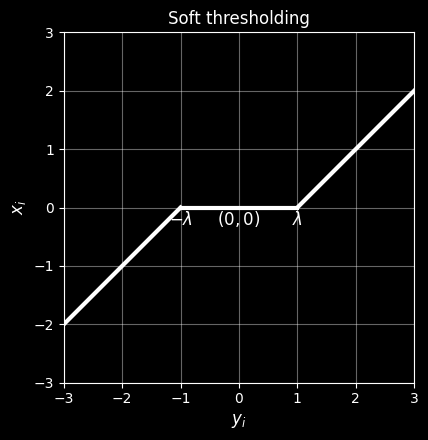

In [3]:
fig_1, ax_1 = plt.subplots(figsize=(4.5, 4.5))

ax_1.plot([-1, 1], [0, 0], 'w', linewidth=3, zorder=0)
ax_1.plot([1, 3], [0, 2], 'w', linewidth=3, zorder=0)
ax_1.plot([-3, -1], [-2, 0], 'w', linewidth=3, zorder=0)

ax_1.text(0, -0.3, r"$(0, 0)$", horizontalalignment='center',fontsize=12, color='w')
ax_1.text(1, -0.3, r"$\lambda$", horizontalalignment='center',fontsize=12, color='w')
ax_1.text(-1, -0.3, r"$-\lambda$", horizontalalignment='center',fontsize=12, color='w')

ax_1.set_xlabel(r"$y_i$", fontsize=12)
ax_1.set_ylabel(r"$x_i$", fontsize=12)
ax_1.set_xlim(-3, 3)
ax_1.set_ylim(-3, 3)
ax_1.set_aspect('equal')
ax_1.grid(True, alpha=0.4)
ax_1.set_title('Soft thresholding')
plt.tight_layout()

plt.show()

##### Constrained optimization

For

$$\min f_0(x), \,\, \text{s.t. } f_i(x)\leq 0$$

If $f_i$ is convex and subdifferentiable, the problem is strictly feasible, then

$x^*$ is primal optimal and $\lambda^*$ is dual optimal if and only if

$$\begin{align*}
& f_i(x^*)\leq 0, \,\, \lambda^*\geq 0 \\
& 0 \in \partial f_0(x^*)+\sum_{i=1}^m\lambda_i^*\partial f_i(x^*)\\
& \lambda_i^* f_i(x^*)=0
\end{align*}$$

This generalizes KKT conditions

#### Directional derivative

The `directional derivative` of $f$ at $x$ in the direction of $\delta x$ is defined as

$$\begin{align*}f'(x;\delta x)&=\lim_{a\rightarrow 0^+} \frac{f(x+a\delta x)-f(x)}{a}\\
&=\lim_{t\rightarrow \infty}\left(tf(x+\frac{1}{t}\delta x)-tf(x)\right)
\end{align*}$$

If $f$ is `differentiable`, then

$$f(x+a\delta x)-f(x)=f(x)+a\nabla f(x)^T\delta x + (a^2/2)\delta x^THf(x)\delta x + O(a^3)-f(x)$$

Plug in and simplify, we have

$$f'(x; \delta x)=\nabla f(x)^T \delta x$$

That is, the directional derivative is a linear function of $\delta x$

If $f$ is `convex and finite` near $x$, then directional derivative always exists

##### Positive homogeneity

For $\lambda >0$, we have

$$\begin{align*}f'(x;\lambda\delta x)&=\lim_{a\rightarrow 0^+} \frac{f(x+a\lambda\delta x)-f(x)}{a}\\
&=\lim_{a\rightarrow 0^+} \lambda\frac{f(x+a\lambda\delta x)-f(x)}{a\lambda}\\
&=\lambda\lim_{a\lambda\rightarrow 0^+} \frac{f(x+a\lambda\delta x)-f(x)}{a\lambda}\\
&=\lambda f'(x;\delta x)
\end{align*}$$

##### Equivalent definition

An equivalent definition for directional derivative of a `convex` $f$ is

$$\begin{align*}f'(x;\delta x)&=\inf_{a> 0} \frac{f(x+a\delta x)-f(x)}{a}\\
&=\inf_{t> 0} \left(tf(x+\frac{1}{t}\delta x)-tf(x)\right)
\end{align*}$$

We can see this by defining $h(\delta x)=f(x+\delta x)-f(x)$, which is convex in $\delta x$

With $h(0)=0$, the perspective of $h(\delta x)$

$$th(\delta x/t)=tf(x+\frac{1}{t}\delta x)-tf(x)$$

is `nonincreasing` in $t>0$

Therefore

$$\lim_{t\rightarrow \infty} th(\delta x/t)=\inf_{t>0} th(\delta x/t)$$

As a result, $f'(x;\delta x)$ defines a lower bound on $f$ in the direction of $\delta x$

$$f(x+a\delta x)\geq f(x) + a f'(x;\delta x), \forall a\geq 0$$

##### Convexity

We can show that $f'(x;y)$ is convex in $y$ for `convex` $f$

Let $u=x+ty, v=x+tz, t>0$

Then for $a\in [0,1]$, we have

$$au+(1-a)v=a(x+ty)+(1-a)(x+tz)=x+t[ay+(1-a)z]$$

Since $f$ is convex, we have

$$f\left(x+t[ay+(1-a)z]\right)\leq a f(x+ty)+(1-a)f(x+tz)$$

or

$$\frac{f\left(x+t[ay+(1-a)z]\right)-f(x)}{t}\leq a \frac{f(x+ty)-f(x)}{t}+(1-a)\frac{f(x+tz)-f(x)}{t}$$

Take $\lim_{t\rightarrow 0^+}$, we have

$$f'(x;ay+(1-a)z)\leq af'(x;y)+(1-a)f'(x;z)$$

This indicates $f'(x;y)$ is convex in $y$

##### Directional derivative and subgradient

For convex $f$ and $x\in \text{int dom }f$

$$f'(x; \delta x)=\sup_{g\in \partial f(x)} g^T\delta x$$

That is, $f'(x;\delta x)$ is `support function` of $\partial f(x)$

To show this, since $g\in \partial f(x)$, therefore by definition

$$f(z)\geq f(x) + g^T(z-x), \forall z$$

Let $z=x+a\delta x$, we have

$$f(x+a\delta x)\geq f(x)+ag^T\delta x$$

or

$$\frac{f(x+a\delta x)-f(x)}{a}\geq g^T\delta x$$

Take infimum over $a>0$, we have

$$f'(x;\delta x)\geq g^T\delta x$$

Next, we need to show that $f'(x;\delta x)=\hat{g}^T\delta x$ for at least one $\hat{g}\in \partial f(x)$

Using convexity of $f'(x;\delta x)$ in $\delta x$ and positive homogeneity, let $\hat{g}$ be a subgradient of $f'(x; \delta x)$ at $\delta x$, we have

$$\lambda f'(x;v)=f'(x;\lambda v)\geq f'(x;\delta x)+\hat{g}^T(\lambda v-\delta x), \forall v, \lambda \geq 0$$

* When $\lambda \rightarrow \infty$, the inequality above is effectively
$$f'(x;v)\geq \hat{g}^T v$$

* Using the lower bound property, we have
$$f(x+v)\geq f(x)+f'(x;v)\geq f(x) + \hat{g}^Tv, \forall v$$
Hence, $\hat{g}\in \partial f(x)$

* When $\lambda = 0$, we have $f'(x;\delta x)\leq \hat{g}^T\delta x$

Therefore, $\hat{g}$ is what are looking for

#### Descent directions

$\delta x$ is a descent direction for $f$ at $x$ if

$$f'(x;\delta x)<0$$

For differentiable $f$, $\delta x=-\nabla f(x)$ is always a descent direction unless it is zero

For nondiffernetiable convex $f$, negative subgradient $\delta x=-g$ is `not` always a descent direction

##### Example

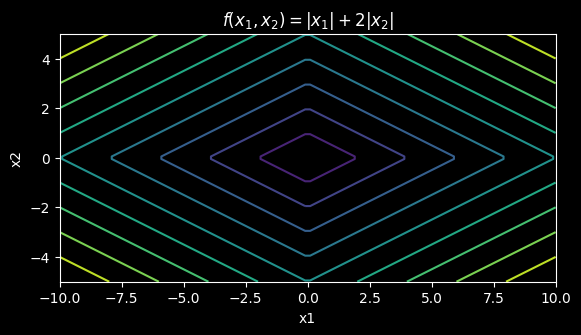

In [4]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1, x2)

z = np.abs(x1) + 2 * np.abs(x2)

# plt.figure(figsize=(8, 6))
contour = plt.contour(x1, x2, z, levels=10, cmap='viridis')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('$f(x_1, x_2) = |x_1| + 2|x_2|$')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

$$f(x_1, x_2)=|x_1|+2|x_2|$$

Since $x_1$ and $x_2$ are `decoupled`, we first see the subdifferential of $f_1(x_1)=|x_1|$

$$\partial f_1(x_1)=\left\{\begin{array}{ll} 1 & x_1>0 \\ -1 & x_1 <0 \\ [-1, 1] & x_1=0\end{array}\right.$$

Similarly, we have the subdifferential of $f_2(x_2)=2|x_2|$

$$\partial f_2(x_2)=\left\{\begin{array}{ll} 2 & x_2>0 \\ -2 & x_2 <0 \\ [-2, 2] & x_2=0\end{array}\right.$$

Therefore, the subdifferential at $(1, 0)$ is

$$\partial f(1, 0)=\{(1, a)|a\in[-2,2]\}$$

If we choose one subgradient $g=(1, 2)\in \partial f(1,0)$ and for a small, `positive` step size $\eta$ in the $-g$ direction

$$\begin{align*}f(x-\eta g)&=f((1, 0)-\eta(1, 2)) \\
&=f(1-\eta, -2\eta) \\
&= |1 - \eta|+4|\eta| \\
& \eta \text{ is small and positive} \\
&= 1 - \eta+4\eta \\
&=1+3\eta
\end{align*}$$

Since

$$f(1, 0)=1$$

we see that $-g$ is not a descent direction

#### Subgradient reduces distance to minimizer

If $f$ in convex, $f(y)<f(x), g\in \partial f(x)$, then for small $t>0$

$$\begin{align*}
\|x-tg-y\|_2^2 &= \|x-y\|_2^2-2tg^T(x-y)+t^2\|g\|_2^2 \\
& f(y)\geq f(x) + g(x)^T(y-x)=f(x) - g(x)^T(x-y) \\
&\leq \|x-y\|_2^2 -2t\left(f(x)-f(y)\right)+t^2\|g\|_2^2 \\
& \text{for small enough }t...\\
&<\|x-y\|_2^2
\end{align*}$$

Therefore, $-g$ is the descent direction for $\|x-y\|_2^2, \forall y$ with $f(y)<f(x)$

If we choose $y$ to be the minimizer, then this says that when moving in the $-g$ direction, the Euclidean distance between $x$ and minimizer of $f$ goes down (despite possible increase in value of $f$)

#### Descent directions and optimality

If we define $\delta x = -\arg \min_{z\in \partial f(x)} \|z\|_2=-z^*$, for convex $f$, we have

* If $\delta x =0$, then $0\in \partial f(x)$, so $x$ is optimal
* otherwise, $\delta x$ is a descent direction as
$$\begin{align*}f'(x;\delta x)& =\sup_{z\in \partial f(x)}-z^Tz^*\\
&=-\inf_{z\in \partial f(x)}z^Tz^* \\
& z^* \text{ is the point in the subdifferential closest to the origin} \\
& = -\|z^*\|_2^2 \\
&=-(\inf_{z\in \partial f(x)}\|z\|_2)^2<0\\
\end{align*}$$

This uses the inequality

$$z^Tz^*-(z^*)^Tz^*=(z-z^*)^Tz^*\geq 0$$

To see this, we can use contradiction

Let

$$w(\lambda) = (1-\lambda)z^* + \lambda z, 0<\lambda<1$$

Since this is convex combination of $z$ and $z^*$, $w(\lambda)\in \partial f(x)$

then

$$\|w(\lambda)\|_2^2=\|z^*\|_2^2+2\lambda(z-z^*)^Tz^*+\lambda^2\|z-z^*\|_2^2$$

If $(z-z^*)^Tz^*< 0$, we see that there exists small, positive $\lambda$ such that $\|w(\lambda)\|_2^2\leq \|z^*\|_2^2$, which is a contradiction

#### Illustration descent and nondescent directions

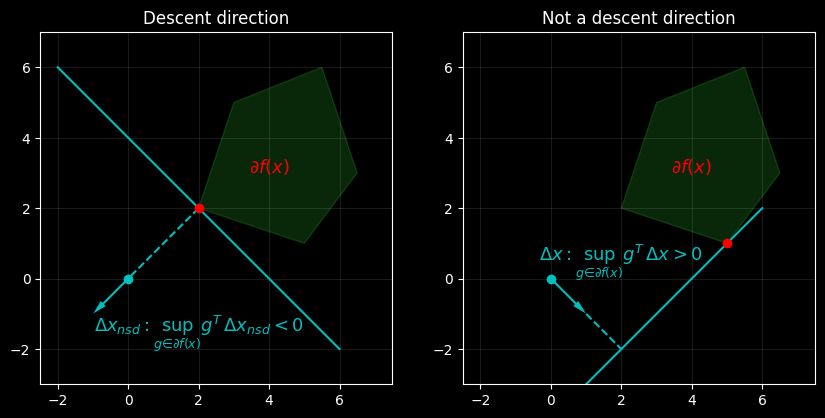

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].text(2, -1.5, r"$\Delta x_{nsd}: \sup_{g\in \partial f(x)}g^T\Delta x_{nsd}<0$", horizontalalignment='center', fontsize=13, color='c')
polygon_points = np.array([[5.5, 6], [6.5, 3], [5, 1], [2, 2], [3, 5]])
ax[0].fill(polygon_points[:, 0], polygon_points[:, 1], color='limegreen', alpha=0.2)
ax[0].plot([2, 0], [2, 0], 'c--')
ax[0].plot([6, -2], [-2, 6], 'c-')
ax[0].plot([0, -1/np.sqrt(2)], [0, -1/np.sqrt(2)], 'c-')
ax[0].arrow(-1/np.sqrt(2)+0.1, -1/np.sqrt(2)+0.1, -0.1, -0.1,
         head_width=0.2, head_length=0.4, fc='c', ec='none', zorder=5, label='Mirror descent')
ax[0].scatter(0, 0, color='c', zorder=6)
ax[0].scatter(2, 2, color='r', zorder=6)

ax[0].text(4, 3, r'$\partial f(x)$', horizontalalignment='center', fontsize=13, color='r')
ax[0].set_xlim(-2.5, 7.5)
ax[0].set_ylim(-3, 7)
ax[0].set_aspect('equal')
ax[0].set_title('Descent direction')
ax[0].grid(True, alpha=0.1)
ax[0].set_aspect('equal')

ax[1].text(2, 0.5, r"$\Delta x: \sup_{g\in \partial f(x)}g^T\Delta x>0$", horizontalalignment='center', fontsize=13, color='c')
polygon_points = np.array([[5.5, 6], [6.5, 3], [5, 1], [2, 2], [3, 5]])
ax[1].fill(polygon_points[:, 0], polygon_points[:, 1], color='limegreen', alpha=0.2)
ax[1].plot([1, 6], [-3, 2], 'c-')
ax[1].plot([1, 2], [-1, -2], 'c--')
ax[1].plot([0, 1/np.sqrt(2)], [0, -1/np.sqrt(2)], 'c-')
ax[1].arrow(1/np.sqrt(2)-0.1, -1/np.sqrt(2)+0.1, 0.1, -0.1,
         head_width=0.2, head_length=0.4, fc='c', ec='none', zorder=5, label='Mirror descent')
ax[1].scatter(0, 0, color='c', zorder=6)
ax[1].scatter(5, 1, color='r', zorder=6)

ax[1].text(4, 3, r'$\partial f(x)$', horizontalalignment='center', fontsize=13, color='r')
ax[1].set_xlim(-2.5, 7.5)
ax[1].set_ylim(-3, 7)
ax[1].set_aspect('equal')
ax[1].grid(True, alpha=0.1)
ax[1].set_title('Not a descent direction')
ax[1].set_aspect('equal')

plt.show()